In [1]:
import torch

In [2]:
def precompute_freqs_cis(dim: int, end: int, theta: float = 10000.0):
    freqs = 1.0 / (theta ** (torch.arange(0, dim, 2)[: (dim // 2)].float() / dim))
    t = torch.arange(end, device=freqs.device, dtype=torch.float32)
    freqs = torch.outer(t, freqs)
    freqs_cis = torch.polar(torch.ones_like(freqs), freqs)  # complex64
    return freqs_cis

**사용된 함수 모두 정리**

- torch.arange(start=0, end, step=1) -> list split과 동일하다고 생각하면 됨.
    - ex) torch.arange(0, 4, 2) >> tensor([0, 2, 4])
-

In [10]:
#@title 변수
dim = 100 #@param {type:"number"}
end = 4096 #@param {type:"number"}
theta = 10000 #@param {type:"number"}


tensor([[ 1.0000+0.0000e+00j,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
          ...,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
          1.0000+0.0000e+00j],
        [ 0.5403+8.4147e-01j,  0.6736+7.3912e-01j,  0.7701+6.3795e-01j,
          ...,  1.0000+1.7378e-04j,  1.0000+1.4454e-04j,
          1.0000+1.2023e-04j],
        [-0.4161+9.0930e-01j, -0.0926+9.9570e-01j,  0.1860+9.8254e-01j,
          ...,  1.0000+3.4756e-04j,  1.0000+2.8909e-04j,
          1.0000+2.4045e-04j],
        ...,
        [-0.8799+4.7523e-01j,  0.4737-8.8066e-01j, -0.4633-8.8620e-01j,
          ...,  0.7575+6.5281e-01j,  0.8300+5.5771e-01j,
          0.8813+4.7247e-01j],
        [-0.8753-4.8361e-01j,  0.9700-2.4301e-01j,  0.2086-9.7799e-01j,
          ...,  0.7574+6.5294e-01j,  0.8300+5.5783e-01j,
          0.8813+4.7257e-01j],
        [-0.0660-9.9782e-01j,  0.8330+5.5330e-01j,  0.7845-6.2018e-01j,
          ...,  0.7573+6.5307e-01j,  0.8299+5.5795e-01j,
          0.8812+4.7268e-01j]])
torch.Size([4096, 50])


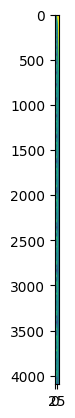

In [24]:
import matplotlib.pyplot as plt
print(precompute_freqs_cis(dim, end, theta))
print(precompute_freqs_cis(dim, end, theta).shape)


plt.imshow(precompute_freqs_cis(dim, end, theta).float())

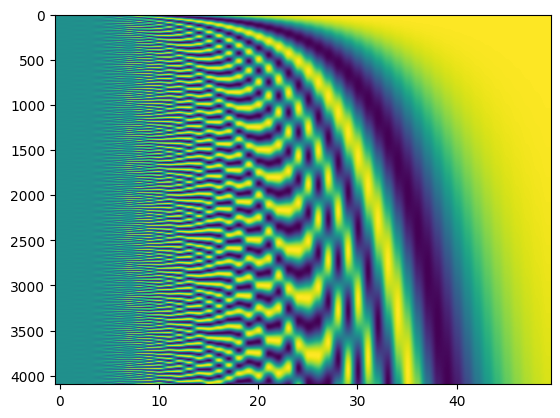

In [41]:
import numpy as np

#plt.figure(figsize=(100,10))
plt.imshow(precompute_freqs_cis(dim, end, theta).float(), aspect='auto')
plt.show()